In [39]:
# System imports
import pathlib
import sys
import warnings
warnings.filterwarnings("ignore")

# Path to data in the system
path = pathlib.Path().resolve().parent
sys.path.insert(0, str(path))

# Thirdparty imports
import matplotlib.pyplot as plt

# Local imports
from src.data_loading import load_data
from src.main import data_analysis, data_analysis_baes, print_params
from src.mixture_fit import sum_exp

Загрузка файла R1-R2-1-5 из репозитория.

In [40]:
x, y = load_data(path.joinpath('data','R1-R2','R1-R2-1-5.txt'))

Analysis of the data with WLS estimator with predefined parameters (For information see docs for data_analysis). \
Returns: \
Number of components estimated by the model. \
Array with estimated parameters of the model. \
Array with estimated parameters' deviation.

In [41]:
num, params, params_std = data_analysis(x, y)

Print parameters

In [4]:
print_params(num, params, params_std)

Number of components = 2
W1 = 0.156 ± 0.017, D1 = 0.310 ± 0.021
W2 = 0.839 ± 0.015, D2 = 1.014 ± 0.019


Plot the calculated models with data

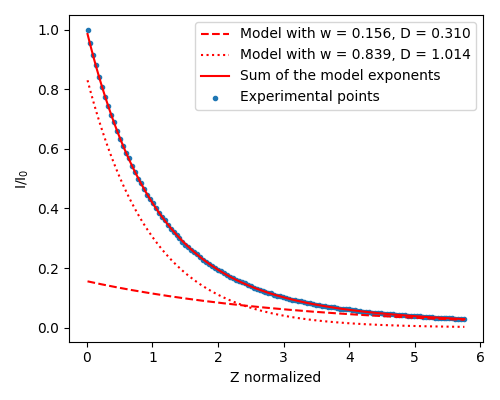

In [44]:
plt.close()
plt.figure(figsize=(5,4))
plt.plot(x, sum_exp(params[:2], x), color='red', linestyle='dashed', label='Model with w = 0.156, D = 0.310')
plt.plot(x, sum_exp(params[2:], x), color='red', linestyle='dotted', label='Model with w = 0.839, D = 1.014')
plt.plot(x, sum_exp(params, x), color='red', label = 'Sum of the model exponents')
plt.scatter(x, y, marker='.', label='Experimental points')
plt.xlabel('Z normalized')
plt.ylabel(r'$\rm I/I_0$')
plt.legend()
plt.tight_layout()
plt.show()

Same for the MAP estimator. (outputs of data_analysis_baes were passed directly to the print_params)

In [24]:
print_params(*data_analysis_baes(x, y))

Number of components = 2
W1 = 0.177 ± 0.014, D1 = 0.331 ± 0.013
W2 = 0.823 ± 0.014, D2 = 1.042 ± 0.014


In [26]:
num, params, params_std = data_analysis_baes(x, y)

Ожидаемые результаты: \
Num of components = 2 \
w1 = 0.167 D1 =  0.27 \
w2 = 0.833 D2 = 1.04 